# **Objective of this dataset is to help crop predection**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('/content/bangladesh_divisions_dataset.csv')

In [ ]:
# Check the first few rows of the dataset
data.head()


,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential


In [ ]:
# Get the shape (number of rows and columns)
data.shape


(2000, 10)

In [ ]:
# Get general information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    2000 non-null   object 
 1   Soil_Type                   2000 non-null   object 
 2   Fertility_Index             2000 non-null   int64  
 3   Land_Use_Type               2000 non-null   object 
 4   Average_Rainfall(mm)        2000 non-null   int64  
 5   Temperature(°C)             2000 non-null   float64
 6   Crop_Suitability            2000 non-null   object 
 7   Season                      2000 non-null   object 
 8   Satellite_Observation_Date  2000 non-null   object 
 9   Remarks                     2000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB


In [ ]:
# Summary statistics for numerical columns
data.describe()


,Fertility_Index,Average_Rainfall(mm),Temperature(°C)
count,2000.00000,2000.000000,2000.000000
mean,70.10450,223.136000,27.330250
std,17.97699,100.548543,4.341251
min,40.00000,50.000000,20.000000
25%,54.00000,137.000000,23.500000
50%,70.00000,222.500000,27.300000
75%,86.00000,308.000000,31.000000
max,100.00000,400.000000,35.000000


In [ ]:
# No missing values detected (all columns have 2000 non-null values)
print(data.isnull().sum())

Location                      0
Soil_Type                     0
Fertility_Index               0
Land_Use_Type                 0
Average_Rainfall(mm)          0
Temperature(°C)               0
Crop_Suitability              0
Season                        0
Satellite_Observation_Date    0
Remarks                       0
dtype: int64


In [ ]:
print(data.dtypes)


Location                       object
Soil_Type                      object
Fertility_Index                 int64
Land_Use_Type                  object
Average_Rainfall(mm)            int64
Temperature(°C)               float64
Crop_Suitability               object
Season                         object
Satellite_Observation_Date     object
Remarks                        object
dtype: object


feature selection


In [ ]:
data = data.drop(columns=["Location", "Satellite_Observation_Date"])


In [ ]:
print(data.dtypes)

Soil_Type                object
Fertility_Index           int64
Land_Use_Type            object
Average_Rainfall(mm)      int64
Temperature(°C)         float64
Crop_Suitability         object
Season                   object
Remarks                  object
dtype: object


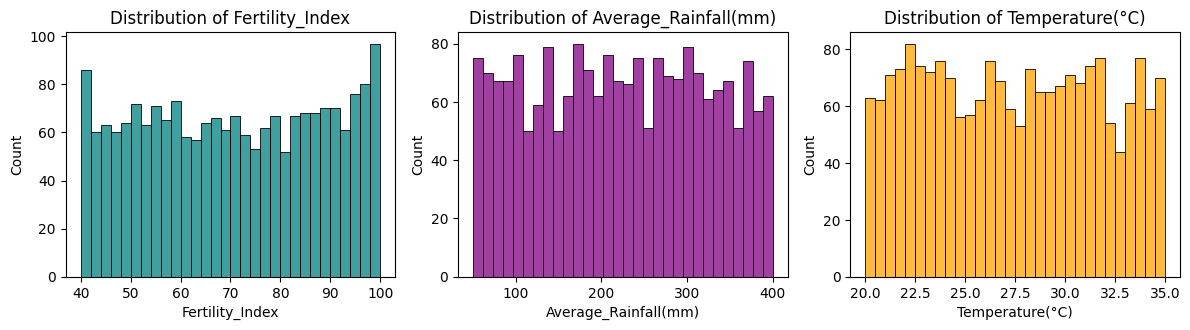

In [ ]:


# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# List of colors (can add more colors if needed)
colors = ["teal",  "purple", "orange","green"]

# Create subplots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)

    # Use a different color from the list for each column
    sns.histplot(data[col], bins=30, color=colors[i-1])  # Color changes for each graph

    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


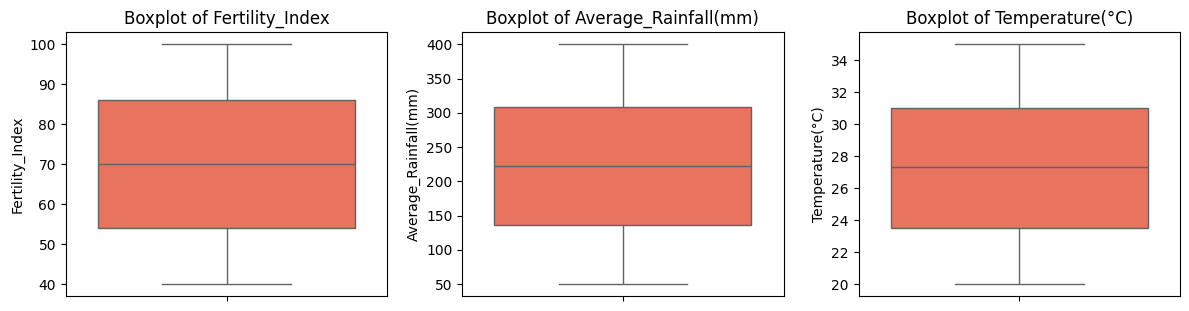

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color="tomato")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [ ]:
# Sélectionner les colonnes catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns

# Afficher les classes et leur nombre pour chaque colonne catégorielle
for col in categorical_cols:
    print(f"\nDistribution pour la colonne '{col}':")
    class_counts = data[col].value_counts()

    # Afficher chaque classe et son nombre
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")



Distribution pour la colonne 'Soil_Type':
Loamy: 425
Sandy: 404
Peaty: 402
Clay: 392
Silt: 377

Distribution pour la colonne 'Land_Use_Type':
Unused: 538
Barren: 502
Agricultural: 483
Residential: 477

Distribution pour la colonne 'Crop_Suitability':
Maize: 309
Tea: 299
Spices: 290
Jute: 283
Rice: 281
Vegetables: 280
Wheat: 258

Distribution pour la colonne 'Season':
Summer: 536
Autumn: 501
Winter: 487
Monsoon: 476

Distribution pour la colonne 'Remarks':
Moderate potential: 516
Low potential: 504
High potential: 504
Requires attention: 476



Loamy (التربة الطينية)
Sandy (التربة الرملية)
Peaty (التربة المبللة أو التربة العضوية)
Clay (التربة الطينية)
Silt (التربة الطميية)
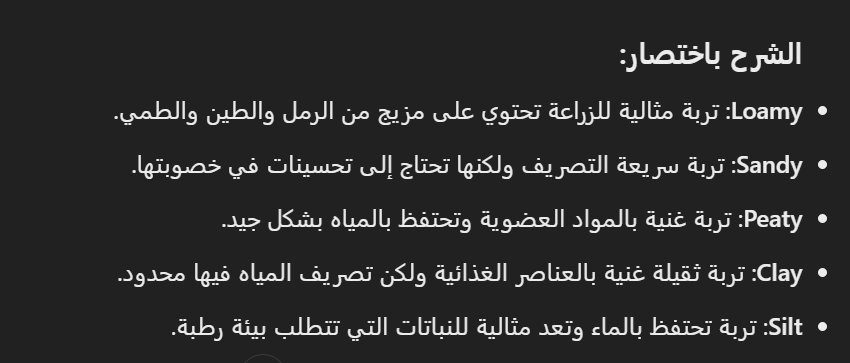

أرض قاحلة :  Barren

Wheat (القمح)

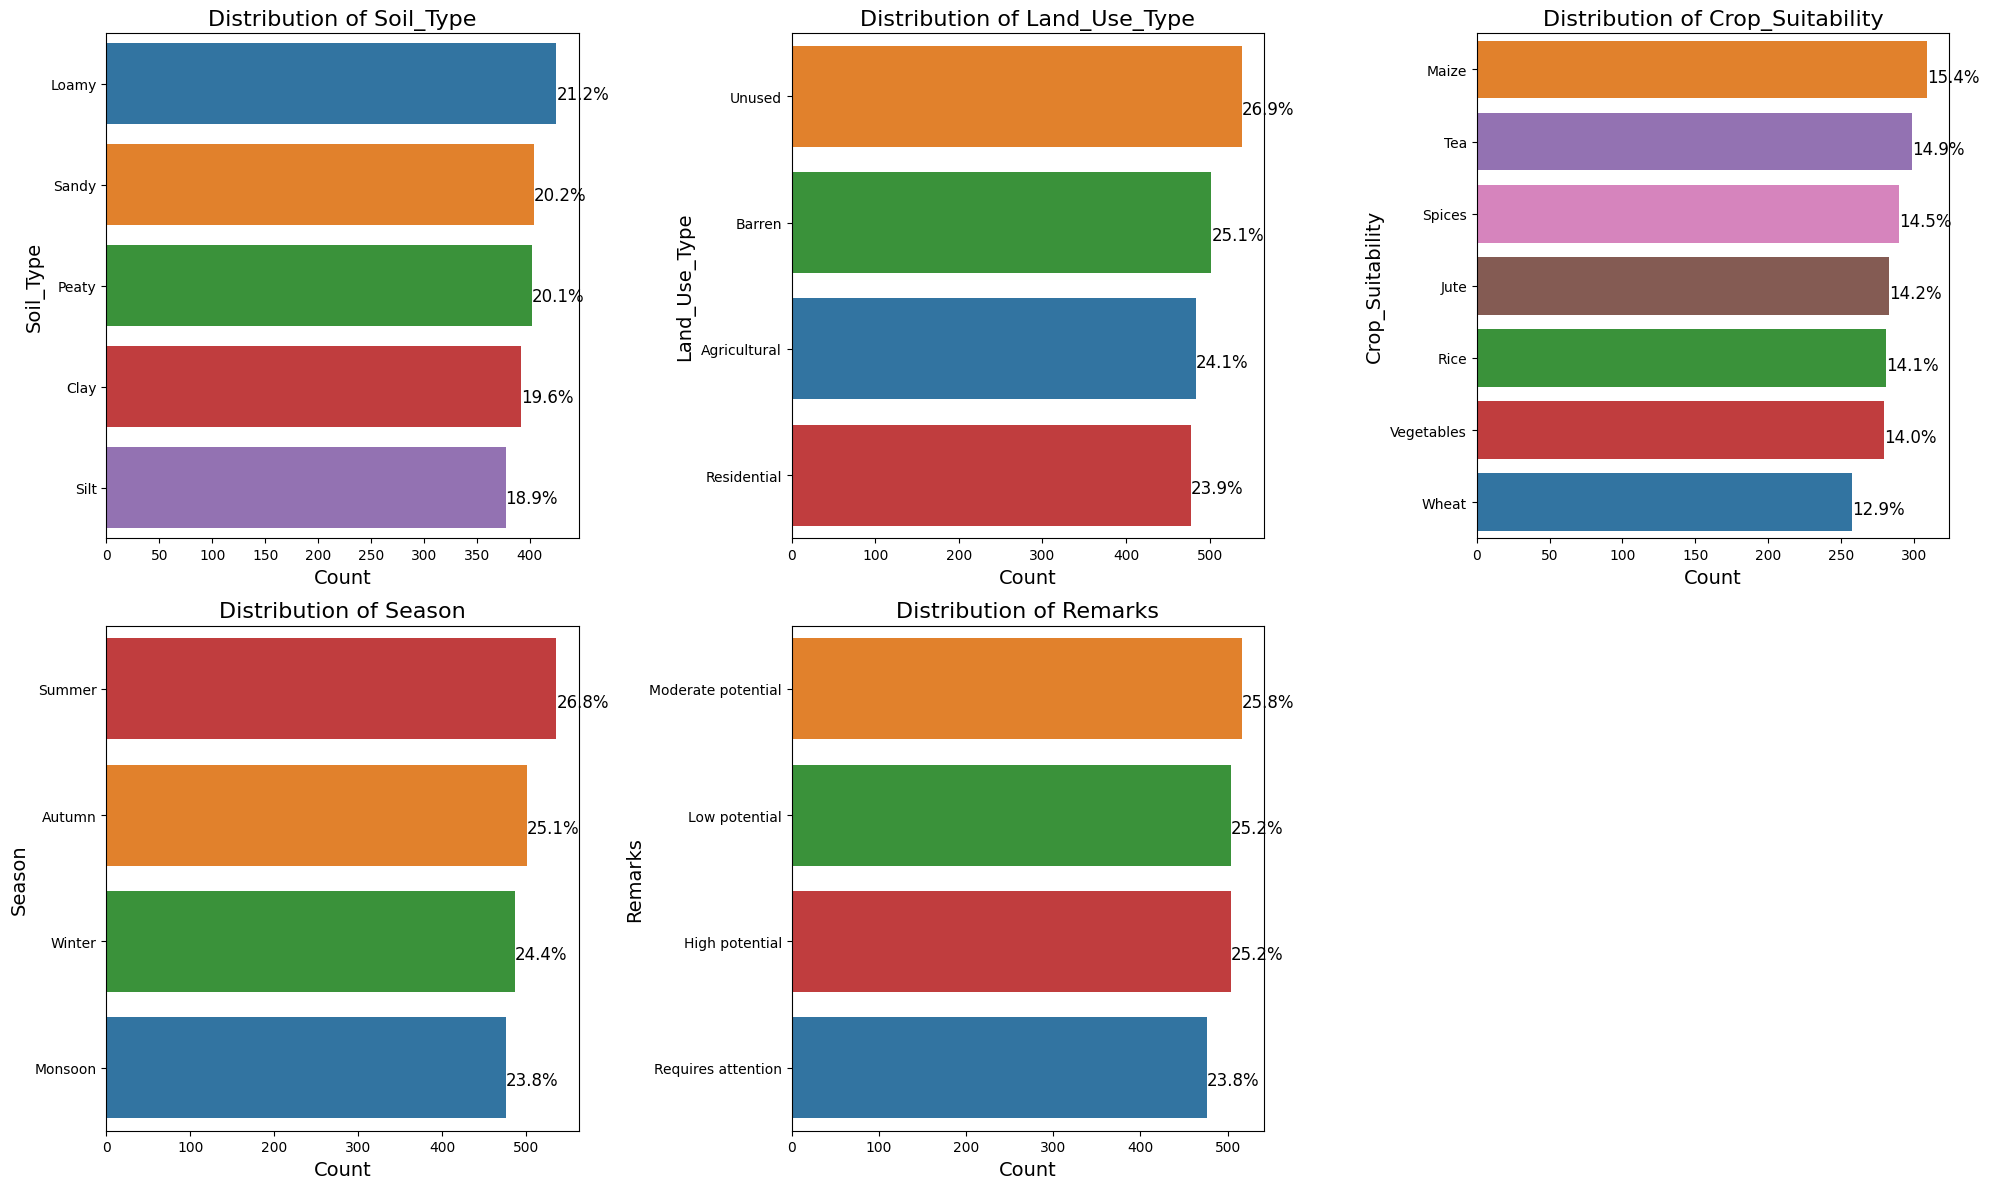

In [ ]:


# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate rows & columns dynamically for subplots
num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 3)  # Adjust row count dynamically

# Increase figure size for bigger graphs
plt.figure(figsize=(20, num_rows * 6))  # Set larger width and height

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 3, i)

    # Fixing the FutureWarning by using hue and removing palette argument in the countplot
    ax = sns.countplot(y=data[col], order=data[col].value_counts().index, hue=data[col], legend=False)

    # Add percentage labels
    total = len(data[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        ax.annotate(percentage, (p.get_width(), p.get_y() + 0.5), fontsize=12, ha='left', va='center')

    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()
plt.show()


encoding the object columns


In [ ]:
print(data['Soil_Type'].unique())
print(data['Land_Use_Type'].unique())
print(data['Crop_Suitability'].unique())
print(data['Season'].unique())
print(data['Remarks'].unique())


['Loamy' 'Sandy' 'Peaty' 'Clay' 'Silt']
['Agricultural' 'Unused' 'Barren' 'Residential']
['Wheat' 'Maize' 'Rice' 'Vegetables' 'Tea' 'Jute' 'Spices']
['Monsoon' 'Autumn' 'Winter' 'Summer']
['Requires attention' 'Moderate potential' 'Low potential'
 'High potential']


In [ ]:
# Mapping for all columns
soil_type_mapping = {
    'Loamy': 1, 'Sandy': 2, 'Peaty': 3, 'Clay': 4, 'Silt': 5
}
land_use_mapping = {
    'Agricultural': 1, 'Unused': 0, 'Barren': 3, 'Residential': 2
}
crop_suitability_mapping = {
    'Wheat': 7, 'Maize': 1, 'Rice': 2, 'Vegetables': 4, 'Tea': 5, 'Jute': 6, 'Spices': 3
}
season_mapping = {
    'Monsoon': 0, 'Autumn': 1, 'Winter': 2, 'Summer': 3
}
remarks_mapping = {
    'Requires attention': 1,
    'Low potential': 2,
    'Moderate potential': 3,
    'High potential': 4
}

# Apply the mappings
data['Soil_Type'] = data['Soil_Type'].map(soil_type_mapping)
data['Land_Use_Type'] = data['Land_Use_Type'].map(land_use_mapping)
data['Crop_Suitability'] = data['Crop_Suitability'].map(crop_suitability_mapping)
data['Season'] = data['Season'].map(season_mapping)
data['Remarks'] = data['Remarks'].map(remarks_mapping)

# Display the updated DataFrame
print(data.head())


   Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0          1               62              1                    72   
1          2               63              0                   118   
2          3               51              1                   106   
3          2               67              3                   336   
4          3               63              1                   237   

   Temperature(°C)  Crop_Suitability  Season  Remarks  
0             28.6                 7       0        1  
1             23.8                 1       1        3  
2             32.0                 1       1        1  
3             31.6                 7       1        2  
4             20.1                 2       2        3  


In [ ]:
# Display the updated DataFrame
print(data.head())

   Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0          1               62              1                    72   
1          2               63              0                   118   
2          3               51              1                   106   
3          2               67              3                   336   
4          3               63              1                   237   

   Temperature(°C)  Crop_Suitability  Season  Remarks  
0             28.6                 7       0        1  
1             23.8                 1       1        3  
2             32.0                 1       1        1  
3             31.6                 7       1        2  
4             20.1                 2       2        3  


Data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the normalized data
print(data.head())



   Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0          1         0.366667              1              0.062857   
1          2         0.383333              0              0.194286   
2          3         0.183333              1              0.160000   
3          2         0.450000              3              0.817143   
4          3         0.383333              1              0.534286   

   Temperature(°C)  Crop_Suitability  Season  Remarks  
0         0.573333                 7       0        1  
1         0.253333                 1       1        3  
2         0.800000                 1       1        1  
3         0.773333                 7       1        2  
4         0.006667                 2       2        3  
